# Pymatgen core functionality

## Structures, sites, and lattices

In [1]:
import pymatgen as mg
mpr = mg.MPRester()
%matplotlib inline

### Exercise: find your favorite oxide using the materials project rester.  Replace each oxygen atom with fluorine.

In [2]:
# Potential solution:

structure = mpr.get_structures("BaNiO3")[0]
for n in range(structure.num_sites):
    if structure[n].species_string == 'O':
        structure[n] = 'F'
    
#print(structure.formula)
#print(structure)

# Using transformations?
from pymatgen.transformations.standard_transformations import SubstitutionTransformation

structure = mpr.get_structures("BaNiO3")[0]
st = SubstitutionTransformation({"O":"F"})
new_structure = st.apply_transformation(structure)
old_structure = st.inverse.apply_transformation(new_structure)
old_structure == structure

True

## SymmetryAnalyzer and StructureMatcher

### Exercise: Perform a transformation on a structure and use the structure matcher on the result.

In [3]:
structure = mpr.get_structures("BaNiO3")[0]
sga = mg.symmetry.analyzer.SpacegroupAnalyzer(structure)
rt = mg.transformations.standard_transformations.RotationTransformation([1, 0, 0], 120)
st = mg.transformations.standard_transformations.SubstitutionTransformation({"O":"F"})

new_structure = rt.apply_transformation(structure)
sm = mg.analysis.structure_matcher.StructureMatcher()
print(sm.fit(structure, new_structure))

new_structure = st.apply_transformation(structure)
print(sm.fit(structure, new_structure))
print(sm.fit_anonymous(structure, new_structure))

True
None
True


## XRD, Bandstructure, and Density of States

### Exercise: Plot the XRD spectra, Bandstructure, and electronic DOS of Au

{'energy': 1.7809999999999997, 'transition': u'\\Gamma-\\Gamma', 'direct': True}
[<OrbitalType.p: 1>, <OrbitalType.s: 0>, <OrbitalType.d: 2>]


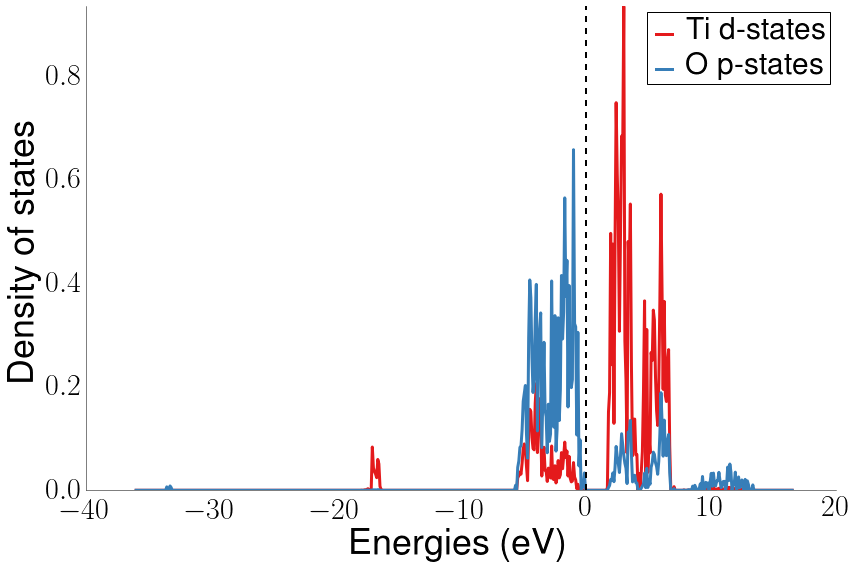

In [60]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter, DosPlotter
from pymatgen.electronic_structure.core import OrbitalType

data = mpr.get_data('TiO2')
structures = mpr.get_structures("TiO2")
xrd_calc = XRDCalculator()
#xrd_calc.show_xrd_plot(structures[0])

bs = mpr.get_bandstructure_by_material_id(data[0]["material_id"])
print(bs.get_band_gap())
plotter=BSPlotter(bs)
#plotter.get_plot().show()
#plotter.plot_brillouin()

dos = mpr.get_dos_by_material_id(data[0]["material_id"])
dp = DosPlotter()
dos_ti = dos.get_element_spd_dos("Ti")
dos_o = dos.get_element_spd_dos("O")
eldos.keys()
print(dos_o.keys())
dp.add_dos("O p-states", dos_o[OrbitalType.p])
dp.add_dos("Ti d-states", dos_ti[OrbitalType.d])
dp.get_plot().show()

## Phase and pourbaix diagrams

### Exercise: Plot phase diagrams and a pourbaix diagram for the Ba-Ni-O chemical system

## Tensors

### Fit a "noisy" tensor to a particular crystal structure

## Surfaces

### Generate all of the low-index facets for BCC Fe